Reading config file: /home/b.weinstein/DeepForest/deepforest/data/deepforest_config.yml


/orange/ewhite/b.weinstein/miniconda3/envs/DeepForest/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DeepFores ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/home/b.weinstein/DeepForest/deepforest/main.py:112: UserWarning: The config file specifies architecture retinanet, but the release model is torchvision retinanet. Reloading with deepforest.main with a retinanet model
  warnings.warn(
/orange/ewhite/b.weinstein/miniconda3/envs/DeepForest/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/orange/ewhite/b.weinstein/miniconda3/envs/DeepForest/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /orange/ewhite/b.weinstein/miniconda3/envs/DeepFores ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
/orange/ewhite/b.weinstein/miniconda3/envs/DeepForest/lib/pyth

Predicting DataLoader 0: 100%|██████████| 9/9 [00:00<00:00, 20.70it/s]
336 predictions in overlapping windows, applying non-max supression
171 predictions kept after non-max suppression


/orange/ewhite/b.weinstein/miniconda3/envs/DeepForest/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


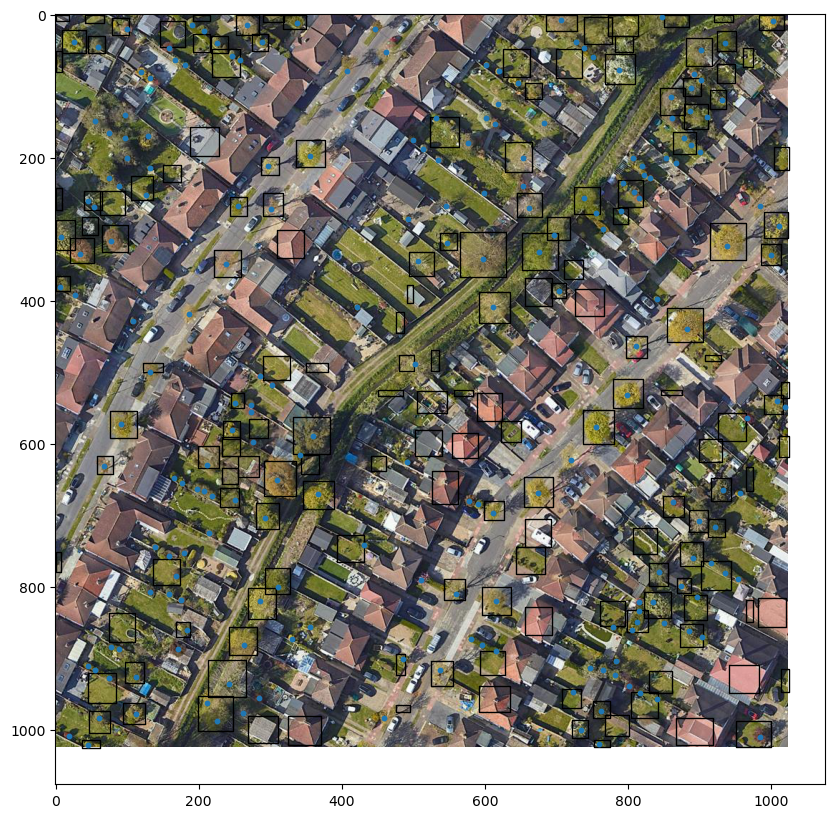

In [27]:
from matplotlib import pyplot as plt
import sys
import pandas as pd
import geopandas
sys.path.insert(0,"/home/b.weinstein/DeepForest/")
from deepforest import main
from deepforest.utilities import boxes_to_shapefile
import rasterio
import numpy as np

fig, ax1 = plt.subplots(figsize=(10, 10))

m = main.deepforest()
m.use_release()
path = "/blue/ewhite/DeepForest/TreeFormer/train_data/images/IMG_711.jpg"
img = rasterio.open(path).read()
img = np.rollaxis(img, 0,3)
boxes = m.predict_tile(raster_path=path, patch_size=500,return_plot=False)
boxes = boxes_to_shapefile(boxes, root_dir="/blue/ewhite/DeepForest/TreeFormer/all_images/")
boxes = boxes[boxes.score>0.4]
pts = pd.read_csv("/blue/ewhite/DeepForest/TreeFormer/all_images/train.csv")
pts = pts[pts.image_path=="IMG_711.jpg"]
gdf = geopandas.GeoDataFrame(
    pts, geometry=geopandas.points_from_xy(pts.x, pts.y), crs=None
)
ax = plt.imshow(img)
boxes.plot(ax=ax1, facecolor="none")
gdf.plot(ax=ax1,  markersize=10)
plt.show()

In [23]:
help(boxes_to_shapefile)

Help on function boxes_to_shapefile in module deepforest.utilities:

boxes_to_shapefile(df, root_dir, projected=True, flip_y_axis=False)
    Convert from image coordinates to geographic coordinates
    Note that this assumes df is just a single plot being passed to this function
    Args:
       df: a pandas type dataframe with columns: name, xmin, ymin, xmax, ymax. Name is the relative path to the root_dir arg.
       root_dir: directory of images to lookup image_path column
       projected: If True, convert from image to geographic coordinates, if False, keep in image coordinate system
       flip_y_axis: If True, reflect predictions over y axis to align with raster data in QGIS, which uses a negative y origin compared to numpy. See https://gis.stackexchange.com/questions/306684/why-does-qgis-use-negative-y-spacing-in-the-default-raster-geotransform
    Returns:
       df: a geospatial dataframe with the boxes optionally transformed to the target crs

